# Cram School Easter Round: Cybersecurity AI Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

## Load the data

In [2]:
df_train = pd.read_csv("./train_data.csv",  dtype={"id": str})
df_test = pd.read_csv("./test_data.csv",  dtype={"id": str})

In [3]:
df_train["pixels"] = df_train["pixels"].apply(eval)
df_test["pixels"] = df_test["pixels"].apply(eval)

In [4]:
len(df_train), len(df_test)

(856, 819)

In [5]:
df_train.head()

,id,pixels,class
0,015002,"[-0.10046728971962617, -0.10046728971962617, -...",1
1,015003,"[-0.10046728971962617, -0.10046728971962617, -...",0
2,015006,"[-0.10046728971962617, -0.10046728971962617, -...",0
3,015010,"[-0.10046728971962617, -0.10046728971962617, -...",0
4,015011,"[-0.10046728971962617, -0.10046728971962617, -...",0


In [6]:
df_train["pixels"].apply(len).unique(), df_test["pixels"].apply(len).unique()

(array([4096]), array([4096]))

## Subtask 1

In [7]:
imgs = np.array(df_train["pixels"].to_list())
imgs.shape

(856, 4096)

In [8]:
mean = imgs.mean(axis=0)
df_train["pixels"] = df_train["pixels"].apply(lambda x: x - mean)

In [9]:
subtask1_rows = []
for i, row in df_train.iterrows():
    subtask1_rows.append((1, row["id"], row["pixels"]))

In [10]:
subtask1_rows[:5]  # First 5

[(1,
  '015002',
  array([-0.10046729, -0.10046729, -0.10046729, ..., -0.57476636,
         -0.66238318, -0.43457944], shape=(4096,))),
 (1,
  '015003',
  array([-0.10046729, -0.10046729, -0.10046729, ..., -0.57476636,
         -0.66238318, -0.43457944], shape=(4096,))),
 (1,
  '015006',
  array([-0.10046729, -0.10046729, -0.10046729, ..., -0.57476636,
         -0.66238318, -0.43457944], shape=(4096,))),
 (1,
  '015010',
  array([-0.10046729, -0.10046729, -0.10046729, ..., -0.57476636,
         -0.66238318, -0.43457944], shape=(4096,))),
 (1,
  '015011',
  array([-0.10046729, -0.10046729, -0.10046729, ..., -0.57476636,
         -0.66238318, -0.43457944], shape=(4096,)))]

In [11]:
df_test["pixels"] = df_test["pixels"].apply(lambda x: x - mean)

## Subtask 2

In [12]:
X = pd.DataFrame(df_train["pixels"].to_list()).to_numpy()
y = df_train["class"].to_numpy()

In [13]:
np.unique(y, return_counts=True)

(array([0, 1]), array([690, 166]))

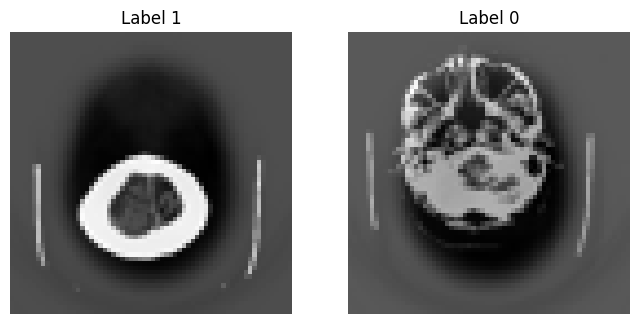

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for i in range(2):
    axes[i].imshow(X[i].reshape(64, 64), cmap='gray')
    axes[i].set_title(f"Label {y[i].item()}")
    axes[i].axis('off')

In [15]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [16]:
clf = MLPClassifier((128, 64, 32), random_state=42)

In [17]:
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    acc = f1_score(y_val, y_pred, average="macro")
    print(f"Fold {fold} F1 score: {acc}")

Fold 1 F1 score: 0.6334185848252345
Fold 2 F1 score: 0.6144562334217507
Fold 3 F1 score: 0.5302197802197802
Fold 4 F1 score: 0.575531914893617
Fold 5 F1 score: 0.6641184902054468


In [18]:
X_test = pd.DataFrame(df_test["pixels"].to_list()).to_numpy()
y_pred = clf.predict(X_test)

In [19]:
subtask2_rows = []
for id_, pred in zip(df_test["id"], y_pred):
    subtask2_rows.append((2, id_, pred))

## Save answers

In [20]:
submission_rows = subtask1_rows + subtask2_rows
df_submission = pd.DataFrame(submission_rows, columns=["subtaskID", "datapointID", "answer"])
df_submission.to_csv("submission.csv", index=False)

## Submission results

Subtask 1:
- Accuracy: 1
- Score: 20/20

Subtask 2:
- F1 score: 0.6087
- Score: 80/80